In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# 1

In [21]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:
1.satisfaction_level​ - Уровень удовлетворенности работой
2.Last_evaluation ​- Время с момента последней оценки в годах
3.number_projects​ - Количество проектов, выполненных за время работы
4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5.time_spend_company​ - Стаж работы в компании в годах
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left​ - уволился ли сотрудник
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9.department ​- отдел в котором работает сотрудник
10.salary​ - относительный уровень зарплаты

# 2

In [31]:
df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [33]:
df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


# 3

<AxesSubplot:>

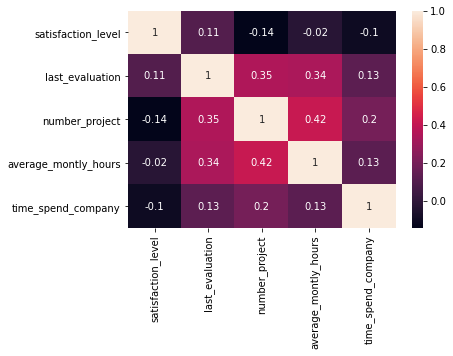

In [37]:
corr = df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].corr()
sns.heatmap(corr, annot = True)

Две самые скоррелированные: number_project и average_montly_hours.
Две самые нескоррелированные: satisfaction_level и average_montly_hours

# 4

In [38]:
df[['satisfaction_level', 'department']].groupby(['department']).agg(['count'])

,satisfaction_level
,count
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140


# 5

<AxesSubplot:>

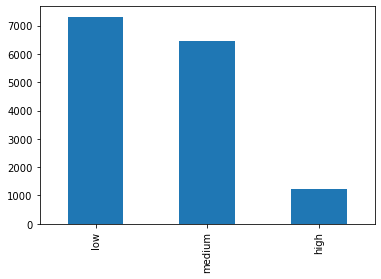

In [41]:
df['salary'].value_counts().plot(kind='bar')

# 6

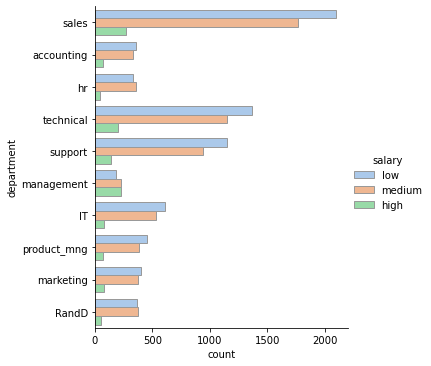

In [51]:
sns.catplot(y='department', hue="salary", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

# 7

Н0: ср. время на работе у сотрудников с разным окладом одинаковое;

Н1: ср. время на работе у сотрудников с разным окладом разное

In [63]:
from scipy import stats as st

In [64]:
df_h = df[df.salary == 'high']
df_h1 = df[df.salary == 'low']

In [71]:
result = st.ttest_ind(df_h['average_montly_hours'], df_h1['average_montly_hours'], equal_var=False)
print(result)

if(result.pvalue < 0.05):
    print('Отвепргаем гипотезу, среднее время на работе у сотрудников с разным окладом одинаковое')
else:
    print('Не отвергаем гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем гипотезу


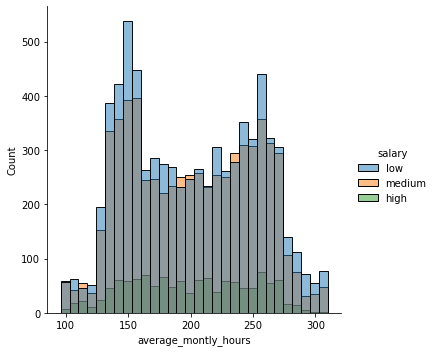

In [73]:
sns.displot(df, x = 'average_montly_hours', hue = 'salary')

# 8

Для уволившихся

In [76]:
print('Доля сотрудников с повышением за последние 5 лет:', len(df[(df.left == 1) & (df.promotion_last_5years == 1)]) / len(df[df.left == 1]))

Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194


In [79]:
print('Средняя степень удовлетворенности:', df[df.left == 1].satisfaction_level.mean())

Средняя степень удовлетворенности: 0.44009801176140917


In [81]:
print('Среднее количество проектов:', df[df.left == 1].number_project.mean())

Среднее количество проектов: 3.8555026603192384


Для не уволившихся

In [82]:
print('Доля сотрудников с повышением за последние 5 лет:', len(df[(df.left == 0) & (df.promotion_last_5years == 1)]) / len(df[df.left == 0]))

Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283


In [83]:
print('Средняя степень удовлетворенности:', df[df.left == 0].satisfaction_level.mean())

Средняя степень удовлетворенности: 0.666809590479516


In [84]:
print('Среднее количество проектов:', df[df.left == 0].number_project.mean())

Среднее количество проектов: 3.786664333216661


# 9

In [86]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [93]:
from sklearn.preprocessing import StandardScaler

In [101]:
df_norm = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']]
scaler = StandardScaler()
df_norm[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']] = scaler.fit_transform(df_norm[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']])
df_norm

<ipython-input-101-d32dc9af1cb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']] = scaler.fit_transform(df_norm[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']])
C:\Users\daria\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,1
...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,1
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,1


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_norm, df_norm.left, test_size=0.25)

In [143]:
lda = LinearDiscriminantAnalysis()

In [144]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [145]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [147]:
accuracy_score(y_test, lda.predict(X_test))

0.7648